In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [13]:
housing = fetch_california_housing()

In [14]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [15]:
print(housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [22]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [23]:
# Créer un DataFrame pandas
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [24]:
# Ajouter la colonne cible au DataFrame
housing_df['MedHouseVal'] = housing.target

In [25]:
print(housing_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [26]:
# Checking the number of rows and columns in the data frame
housing_df.shape

(20640, 9)

In [27]:
# Ckecking missing values (We have to do some preprocessing, before feeding our data to the machine learning algorithm)
housing_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [28]:
# We have no missing values

In [29]:
# Statistical measures of the dataset
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [30]:
# Understanding the correlation between various features in the dataset

In [31]:
correlation = housing_df.corr()

<Axes: >

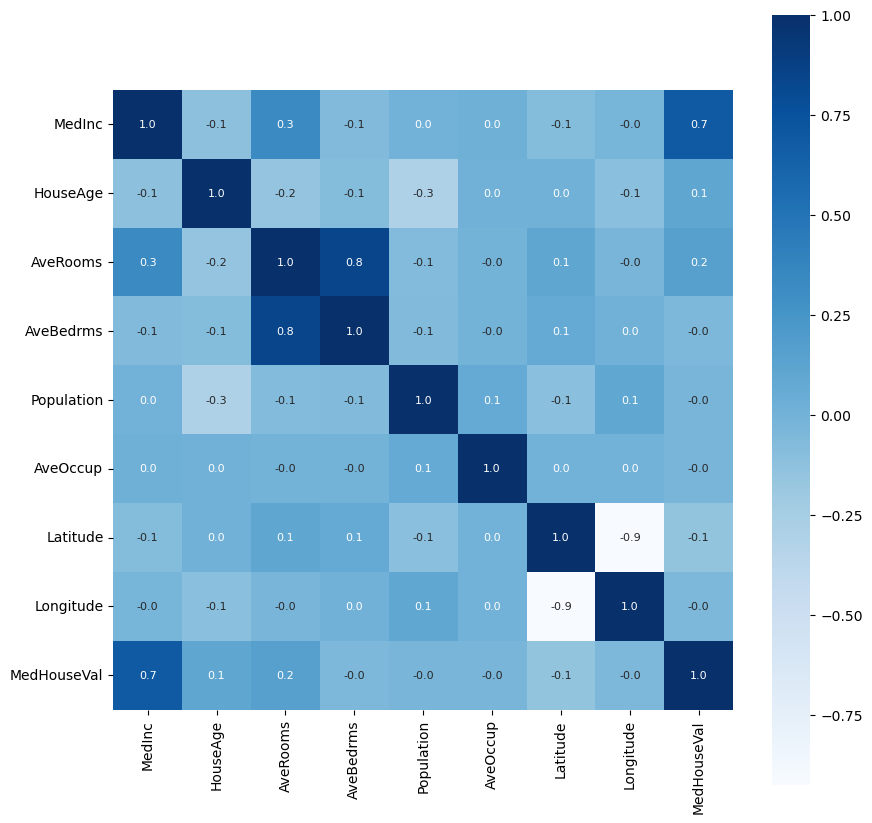

In [32]:
# Plotting a heatmap to visualize and understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot = True, annot_kws={'size':8}, cmap='Blues')

In [33]:
# Split the data and target

In [36]:
X = housing_df.drop(['MedHouseVal'], axis=1)
Y = housing_df['MedHouseVal']

In [37]:
print(X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [38]:
print(Y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size =  0.2, random_state = 2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [41]:
# Model Training
# XGBoost Regressor

In [42]:
# Loading the model
model = XGBRegressor()

In [43]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
# Evaluation

In [45]:
# Prediction on training data

In [46]:
#  accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [47]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [48]:
for value in training_data_prediction:
    print(value)


0.5523039
3.0850039
0.5835302
2.310718
1.4580092
2.8919494
4.2584085
2.0111814
1.0252554
3.4020548
5.0805907
1.7576598
2.0677762
1.8493054
2.1403747
3.3406632
3.3995788
0.9947858
1.7804332
2.953775
2.242482
1.4224372
2.9064353
1.3589915
1.8498393
2.7713513
3.0687342
2.690045
0.9229922
1.0682734
1.916483
0.7060843
1.0329409
4.6740923
1.3895812
0.5652341
1.959158
4.6417947
3.4191725
1.8507385
1.4389927
3.4178207
1.02248
1.1083055
0.8212047
5.0531397
1.5810082
1.9790201
1.5892102
1.2915171
2.943054
1.2682779
2.2227972
1.057588
1.0526277
4.010459
1.3054132
5.0327067
2.5898335
3.8855433
3.1787903
1.9326687
1.1675671
2.6558237
2.1805158
1.6165935
1.925088
1.2112659
2.5675957
4.8523083
1.5413672
3.263883
1.8827611
1.9868912
1.9619687
1.8615184
1.2911286
3.804037
2.0847077
0.97461486
1.4064199
2.4477863
3.0220637
1.6183778
2.4863455
3.8774178
3.8092108
0.6219906
2.161224
3.020241
0.52295065
2.513421
1.0764323
1.7545551
1.7279165
0.76260245
3.8305814
1.5672405
1.2525392
0.53378236
2.8524704
1.8

In [49]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

In [50]:
# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

In [51]:
print("R squared error :", score_1)
print('Mean absolute error :', score_2)

R squared error : 0.943650140819218
Mean absolute error : 0.1933648700612105


In [52]:
# Prediction on test data

In [53]:
# Accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [54]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

In [55]:
# Mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [56]:
print("R squared error :", score_1)
print('Mean absolute error :', score_2)

R squared error : 0.8338000331788725
Mean absolute error : 0.3108631800268186


In [57]:
# Visualizing the actual price and predicted prices

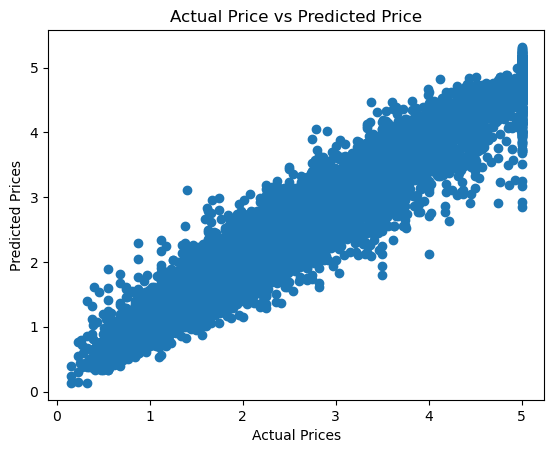

In [58]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()